In [ ]:
!pip install tensorflow numpy pandas matplotlib scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print("✓ TensorFlow version:", tf.__version__)
print("✓ NumPy version:", np.__version__)
print("✓ Pandas version:", pd.__version__)
print("✓ Scikit-learn version:", sklearn.__version__)
print("\nAll libraries are ready!")

✓ TensorFlow version: 2.19.0
✓ NumPy version: 2.0.2
✓ Pandas version: 2.2.2
✓ Scikit-learn version: 1.6.1

All libraries are ready!


In [ ]:
from google.colab import files
import zipfile
import os

print("Click 'Choose Files' and upload your zip file...")
uploaded = files.upload()

# Get the zip filename
zip_filename = list(uploaded.keys())[0]
print(f"\n✓ Uploaded: {zip_filename}")

# Extract the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('data')

print("✓ Zip file extracted to 'data' folder!")

Click 'Choose Files' and upload your zip file...


Saving wykht8y7tg-1.zip to wykht8y7tg-1.zip

✓ Uploaded: wykht8y7tg-1.zip
✓ Zip file extracted to 'data' folder!


In [ ]:
import os

# Function to list all files recursively
def list_files(directory, indent=0):
    items = os.listdir(directory)
    for item in sorted(items):
        item_path = os.path.join(directory, item)
        print("  " * indent + f"📄 {item}" if os.path.isfile(item_path) else "  " * indent + f"📁 {item}")
        if os.path.isdir(item_path):
            list_files(item_path, indent + 1)

print("="*60)
print("DATASET CONTENTS:")
print("="*60)
list_files('data')

DATASET CONTENTS:
📁 Panasonic 18650PF Data
  📁 -10degC
    📁 5 pulse test
      📄 06-07-17_12.29 n10degC_5pulse_HPPC_Pan18650PF.mat
      📄 06-07-17_14.11 3740_dis5_10p.mat
    📁 Charges and Pauses
      📄 06-07-17_08.40 3740_PreChg.mat
      📄 06-08-17_10.21 3740_Charge1a.mat
      📄 06-10-17_05.35 3740_Charge2a.mat
      📄 06-10-17_09.26 3740_Pause1.mat
      📄 06-10-17_13.07 3740_Charge1.mat
      📄 06-10-17_16.36 3740_Pause2.mat
      📄 06-10-17_20.16 3740_Charge2.mat
      📄 06-10-17_23.40 3740_Pause3.mat
      📄 06-11-17_03.15 3740_Charge3.mat
      📄 06-11-17_06.43 3740_Pause4.mat
      📄 06-14-17_08.03 3787_TS003396.mat
      📄 06-14-17_08.04 3787_Charge8.mat
      📄 06-14-17_11.13 3787_Pause9.mat
      📄 06-14-17_14.40 3787_Charge9.mat
    📁 Drive Cycles
      📄 06-07-17_08.39 n10degC_HWFET_Pan18650PF.mat
      📄 06-07-17_08.39 n10degC_LA92_Pan18650PF.mat
      📄 06-07-17_08.39 n10degC_UDDS_Pan18650PF.mat
      📄 06-07-17_08.39 n10degC_US06_HWFET_UDDS_LA92_Pan18650PF.mat
     

In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the 4 discharge cycles
print("Loading discharge cycles...")

cycle1 = scipy.io.loadmat('data/Drive cycles/25degC_Cycle_1_Pan18650PF.mat')
cycle2 = scipy.io.loadmat('data/Drive cycles/25degC_Cycle_2_Pan18650PF.mat')
cycle3 = scipy.io.loadmat('data/Drive cycles/25degC_Cycle_3_Pan18650PF.mat')
cycle4 = scipy.io.loadmat('data/Drive cycles/25degC_Cycle_4_Pan18650PF.mat')

print("✓ All 4 cycles loaded!")

# Let's see what's inside cycle 1
print("\n" + "="*60)
print("EXPLORING CYCLE 1 STRUCTURE:")
print("="*60)
print("Keys in the data:", cycle1.keys())

Loading discharge cycles...


FileNotFoundError: [Errno 2] No such file or directory: 'data/Drive cycles/25degC_Cycle_1_Pan18650PF.mat'

In [ ]:
import os

# Check what's directly in the data folder
print("Contents of 'data' folder:")
for item in os.listdir('data'):
    print(f"  - {item}")

# Check if there's a subfolder
subfolders = [item for item in os.listdir('data') if os.path.isdir(os.path.join('data', item))]
if subfolders:
    print(f"\nLooking inside '{subfolders[0]}':")
    drive_cycles_path = os.path.join('data', subfolders[0])
    for item in os.listdir(drive_cycles_path):
        if 'Cycle' in item and '25degC' in item:
            print(f"  ✓ {item}")

Contents of 'data' folder:
  - Panasonic 18650PF Data

Looking inside 'Panasonic 18650PF Data':


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First, let's find the correct path
base_path = 'data'
items = os.listdir(base_path)

# Find the Drive cycles folder (might have different name)
drive_folder = None
for item in items:
    if 'Drive' in item or 'drive' in item:
        drive_folder = item
        break

if drive_folder:
    cycles_path = os.path.join(base_path, drive_folder)
    print(f"Found drive cycles folder: {cycles_path}")
else:
    # If extracted directly into data folder
    cycles_path = base_path

# Load the 4 discharge cycles with correct path
print("\nLoading discharge cycles...")

cycle1 = scipy.io.loadmat(f'{cycles_path}/25degC_Cycle_1_Pan18650PF.mat')
cycle2 = scipy.io.loadmat(f'{cycles_path}/25degC_Cycle_2_Pan18650PF.mat')
cycle3 = scipy.io.loadmat(f'{cycles_path}/25degC_Cycle_3_Pan18650PF.mat')
cycle4 = scipy.io.loadmat(f'{cycles_path}/25degC_Cycle_4_Pan18650PF.mat')

print("✓ All 4 cycles loaded successfully!")

# Explore the structure
print("\n" + "="*60)
print("EXPLORING CYCLE 1 STRUCTURE:")
print("="*60)
print("Keys:", [k for k in cycle1.keys() if not k.startswith('__')])


Loading discharge cycles...


FileNotFoundError: [Errno 2] No such file or directory: 'data/25degC_Cycle_1_Pan18650PF.mat'

In [ ]:
import os

def find_files(directory, search_term='25degC_Cycle'):
    """Find all files matching the search term"""
    matches = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if search_term in file:
                full_path = os.path.join(root, file)
                matches.append(full_path)
    return matches

# Find the cycle files
print("Searching for cycle files...")
cycle_files = find_files('data', '25degC_Cycle')

if cycle_files:
    print(f"\n✓ Found {len(cycle_files)} cycle files:")
    for f in sorted(cycle_files):
        print(f"  {f}")
else:
    print("\n❌ No cycle files found. Let's see all .mat files:")
    all_mat = find_files('data', '.mat')
    for f in sorted(all_mat)[:20]:  # Show first 20
        print(f"  {f}")


Searching for cycle files...

✓ Found 4 cycle files:
  data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/03-18-17_02.17 25degC_Cycle_1_Pan18650PF.mat
  data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/03-19-17_03.25 25degC_Cycle_2_Pan18650PF.mat
  data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/03-19-17_09.07 25degC_Cycle_3_Pan18650PF.mat
  data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/03-19-17_14.31 25degC_Cycle_4_Pan18650PF.mat


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the correct paths
base_path = 'data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/'

print("Loading discharge cycles...")

cycle1 = scipy.io.loadmat(base_path + '03-18-17_02.17 25degC_Cycle_1_Pan18650PF.mat')
cycle2 = scipy.io.loadmat(base_path + '03-19-17_03.25 25degC_Cycle_2_Pan18650PF.mat')
cycle3 = scipy.io.loadmat(base_path + '03-19-17_09.07 25degC_Cycle_3_Pan18650PF.mat')
cycle4 = scipy.io.loadmat(base_path + '03-19-17_14.31 25degC_Cycle_4_Pan18650PF.mat')

print("✓ All 4 cycles loaded successfully!")

# Explore the structure of cycle 1
print("\n" + "="*60)
print("EXPLORING CYCLE 1 STRUCTURE:")
print("="*60)

# Show non-private keys
keys = [k for k in cycle1.keys() if not k.startswith('__')]
print("Available keys:", keys)

# Let's look at the main data structure
if keys:
    main_key = keys[0]
    print(f"\nExamining '{main_key}':")
    print(f"Type: {type(cycle1[main_key])}")
    print(f"Shape: {cycle1[main_key].shape}")

    # If it's a structured array, show field names
    if hasattr(cycle1[main_key], 'dtype') and cycle1[main_key].dtype.names:
        print(f"Fields available: {cycle1[main_key].dtype.names}")

Loading discharge cycles...
✓ All 4 cycles loaded successfully!

EXPLORING CYCLE 1 STRUCTURE:
Available keys: ['meas']

Examining 'meas':
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
Fields available: ('TimeStamp', 'Voltage', 'Current', 'Ah', 'Wh', 'Power', 'Battery_Temp_degC', 'Time', 'Chamber_Temp_degC')


In [ ]:
# Extract data from all 4 cycles
def extract_cycle_data(cycle_mat):
    """Extract data from MATLAB structure"""
    data = cycle_mat['meas'][0, 0]

    df = pd.DataFrame({
        'Time': data['Time'].flatten(),
        'Voltage': data['Voltage'].flatten(),
        'Current': data['Current'].flatten(),
        'Ah': data['Ah'].flatten(),  # Ampere-hours (used to calculate SoC)
        'Temperature': data['Battery_Temp_degC'].flatten(),
    })

    return df

# Extract all 4 cycles
print("Extracting data from cycles...")
df1 = extract_cycle_data(cycle1)
df2 = extract_cycle_data(cycle2)
df3 = extract_cycle_data(cycle3)
df4 = extract_cycle_data(cycle4)

print("✓ Data extracted successfully!")
print(f"\nCycle 1: {len(df1)} samples")
print(f"Cycle 2: {len(df2)} samples")
print(f"Cycle 3: {len(df3)} samples")
print(f"Cycle 4: {len(df4)} samples")
print(f"Total: {len(df1) + len(df2) + len(df3) + len(df4)} samples")

# Show first few rows of Cycle 1
print("\n" + "="*60)
print("CYCLE 1 - First 5 rows:")
print("="*60)
print(df1.head())

# Check data ranges
print("\n" + "="*60)
print("DATA RANGES (Cycle 1):")
print("="*60)
print(df1.describe())

Extracting data from cycles...
✓ Data extracted successfully!

Cycle 1: 109641 samples
Cycle 2: 111268 samples
Cycle 3: 102441 samples
Cycle 4: 120863 samples
Total: 444213 samples

CYCLE 1 - First 5 rows:
       Time  Voltage  Current       Ah  Temperature
0  0.000000  4.14585 -1.81290 -0.00000    21.781981
1  0.095996  4.10532 -1.83249 -0.00005    21.781981
2  0.202001  4.08666 -1.85046 -0.00010    21.781981
3  0.297997  4.08087 -1.85781 -0.00015    21.781981
4  0.403005  4.07765 -1.86353 -0.00021    21.781981

DATA RANGES (Cycle 1):
                Time        Voltage        Current             Ah  \
count  109641.000000  109641.000000  109641.000000  109641.000000   
mean     5491.533697       3.677105      -0.885407      -1.284838   
std      3171.098023       0.261036       1.999373       0.772464   
min         0.000000       2.502050     -19.436370      -2.695570   
25%      2746.340998       3.532720      -1.760630      -1.857300   
50%      5492.845996       3.651740      -0.

Calculating SoC for all cycles...
✓ SoC calculated for all cycles!


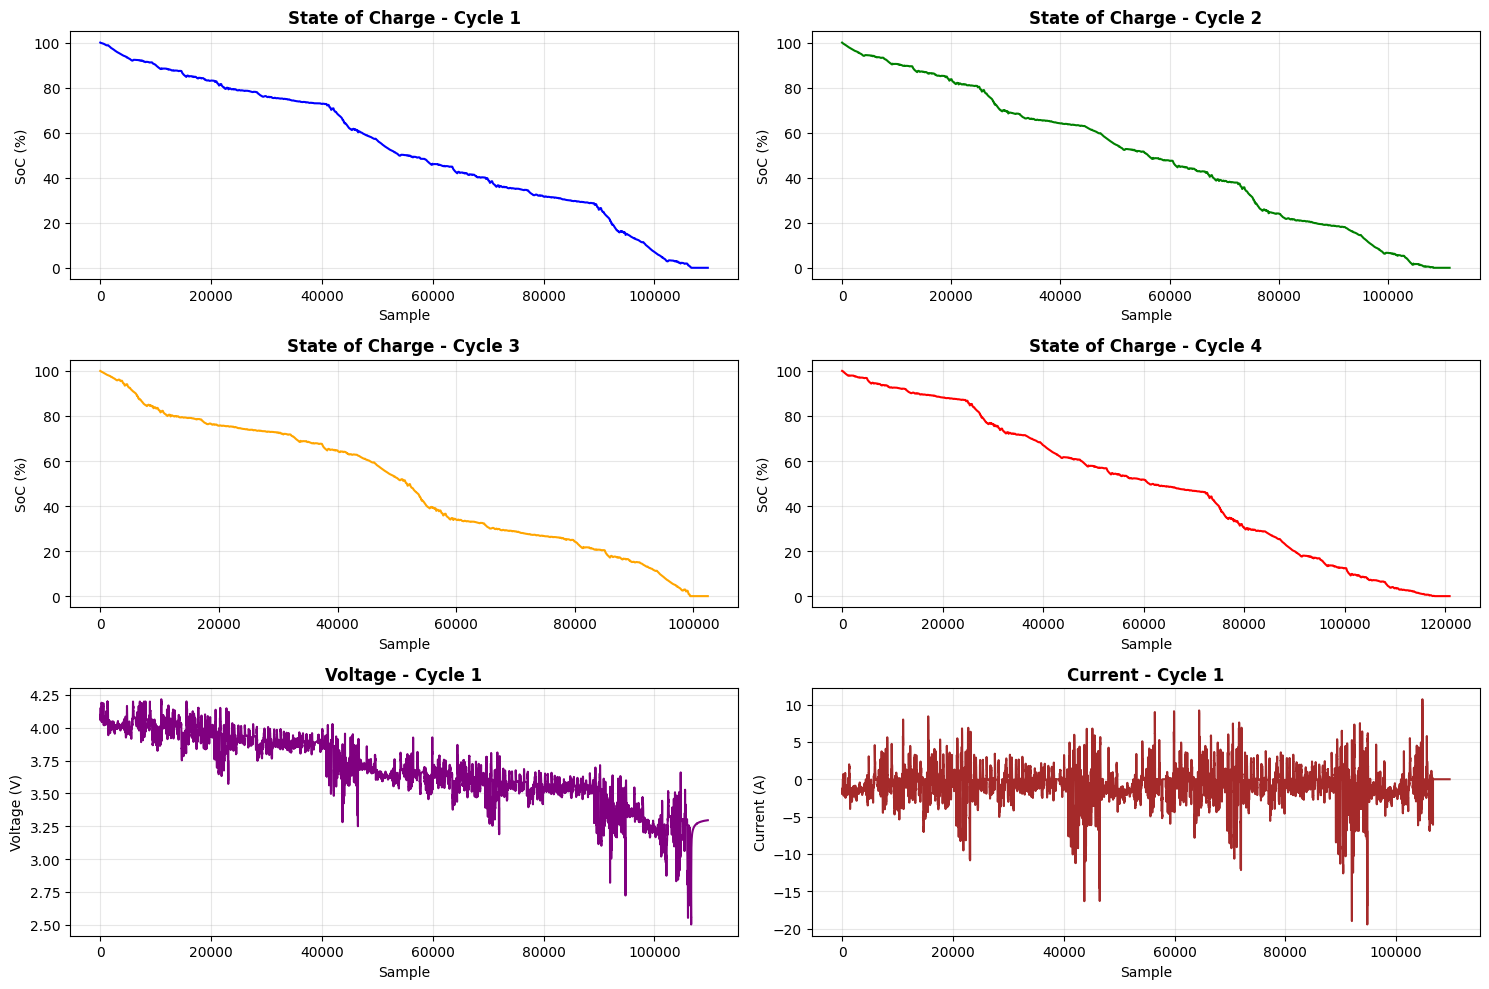


SoC STATISTICS:
Cycle 1 - SoC range: 0.00% to 100.00%
Cycle 2 - SoC range: 0.00% to 100.00%
Cycle 3 - SoC range: 0.00% to 100.00%
Cycle 4 - SoC range: 0.00% to 100.00%

✅ STEP 2 COMPLETE!
✓ Loaded 4 discharge cycles
✓ Total samples: 444,213
✓ SoC calculated for all cycles
✓ Data looks good and ready for preprocessing!


In [ ]:
# Calculate SoC for each cycle
# SoC = (Current_Ah / Max_Capacity) * 100
# For discharge: SoC goes from 100% to 0%

def calculate_soc(df, battery_capacity=2.9):  # 2.9 Ah nominal capacity
    """
    Calculate State of Charge
    For discharge cycles, we start at 100% and decrease
    """
    # Get the Ah values (they're negative for discharge)
    ah = df['Ah'].values

    # Calculate SoC (starting from 100%)
    # Since Ah is negative and decreasing, we calculate remaining capacity
    min_ah = ah.min()  # Most negative value (end of discharge)
    max_ah = ah.max()  # Least negative value (start of discharge)

    # SoC percentage based on remaining capacity
    soc = ((ah - min_ah) / (max_ah - min_ah)) * 100

    # Clip to [0, 100] range just to be safe
    soc = np.clip(soc, 0, 100)

    return soc

# Add SoC to each dataframe
print("Calculating SoC for all cycles...")
df1['SoC'] = calculate_soc(df1)
df2['SoC'] = calculate_soc(df2)
df3['SoC'] = calculate_soc(df3)
df4['SoC'] = calculate_soc(df4)

print("✓ SoC calculated for all cycles!")

# Visualize SoC for all cycles
plt.figure(figsize=(15, 10))

# Plot SoC for all 4 cycles
plt.subplot(3, 2, 1)
plt.plot(df1['SoC'], linewidth=1.5, color='blue')
plt.title('State of Charge - Cycle 1', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('SoC (%)')
plt.grid(True, alpha=0.3)
plt.ylim([-5, 105])

plt.subplot(3, 2, 2)
plt.plot(df2['SoC'], linewidth=1.5, color='green')
plt.title('State of Charge - Cycle 2', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('SoC (%)')
plt.grid(True, alpha=0.3)
plt.ylim([-5, 105])

plt.subplot(3, 2, 3)
plt.plot(df3['SoC'], linewidth=1.5, color='orange')
plt.title('State of Charge - Cycle 3', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('SoC (%)')
plt.grid(True, alpha=0.3)
plt.ylim([-5, 105])

plt.subplot(3, 2, 4)
plt.plot(df4['SoC'], linewidth=1.5, color='red')
plt.title('State of Charge - Cycle 4', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('SoC (%)')
plt.grid(True, alpha=0.3)
plt.ylim([-5, 105])

# Plot voltage for Cycle 1
plt.subplot(3, 2, 5)
plt.plot(df1['Voltage'], linewidth=1.5, color='purple')
plt.title('Voltage - Cycle 1', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)

# Plot current for Cycle 1
plt.subplot(3, 2, 6)
plt.plot(df1['Current'], linewidth=1.5, color='brown')
plt.title('Current - Cycle 1', fontsize=12, fontweight='bold')
plt.xlabel('Sample')
plt.ylabel('Current (A)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show SoC statistics
print("\n" + "="*60)
print("SoC STATISTICS:")
print("="*60)
print(f"Cycle 1 - SoC range: {df1['SoC'].min():.2f}% to {df1['SoC'].max():.2f}%")
print(f"Cycle 2 - SoC range: {df2['SoC'].min():.2f}% to {df2['SoC'].max():.2f}%")
print(f"Cycle 3 - SoC range: {df3['SoC'].min():.2f}% to {df3['SoC'].max():.2f}%")
print(f"Cycle 4 - SoC range: {df4['SoC'].min():.2f}% to {df4['SoC'].max():.2f}%")

print("\n" + "="*60)
print("✅ STEP 2 COMPLETE!")
print("="*60)
print(f"✓ Loaded 4 discharge cycles")
print(f"✓ Total samples: {len(df1) + len(df2) + len(df3) + len(df4):,}")
print(f"✓ SoC calculated for all cycles")
print(f"✓ Data looks good and ready for preprocessing!")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Combine all 4 cycles
print("Combining all 4 discharge cycles...")
all_data = pd.concat([df1, df2, df3, df4], ignore_index=True)

print(f"✓ Combined data shape: {all_data.shape}")
print(f"✓ Total samples: {len(all_data):,}")

# Extract SoC column (our target variable)
soc_data = all_data['SoC'].values

print(f"\nSoC data shape: {soc_data.shape}")
print(f"SoC range: {soc_data.min():.2f}% to {soc_data.max():.2f}%")

# Convert to 0-1 range (from 0-100%)
soc_data = soc_data / 100.0
print(f"After scaling: {soc_data.min():.4f} to {soc_data.max():.4f}")

# Reshape for scaler (needs 2D array)
soc_data = soc_data.reshape(-1, 1)

# Normalize using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
soc_scaled = scaler.fit_transform(soc_data)

print(f"\n✓ Data normalized")
print(f"Scaled SoC shape: {soc_scaled.shape}")
print(f"Scaled SoC range: {soc_scaled.min():.4f} to {soc_scaled.max():.4f}")

Combining all 4 discharge cycles...
✓ Combined data shape: (444213, 6)
✓ Total samples: 444,213

SoC data shape: (444213,)
SoC range: 0.00% to 100.00%
After scaling: 0.0000 to 1.0000

✓ Data normalized
Scaled SoC shape: (444213, 1)
Scaled SoC range: 0.0000 to 1.0000


In [ ]:
def create_sequences(data, look_back=60):
    """
    Create sequences for LSTM input
    Input: data of shape (n_samples, 1)
    Output: X of shape (n_samples, look_back, 1), y of shape (n_samples,)
    """
    X, y = [], []
    for i in range(len(data) - look_back):
        # Take previous 60 time steps as features
        X.append(data[i:(i + look_back), 0])
        # Predict the next time step
        y.append(data[i + look_back, 0])

    return np.array(X), np.array(y)

# Create sequences with look_back = 60
LOOK_BACK = 60
print(f"Creating sequences with look_back = {LOOK_BACK}...")

X, y = create_sequences(soc_scaled, LOOK_BACK)

print(f"\n✓ Sequences created!")
print(f"X shape: {X.shape}")  # Should be (n_samples, 60)
print(f"y shape: {y.shape}")  # Should be (n_samples,)

# Reshape X for LSTM: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(f"X reshaped for LSTM: {X.shape}")  # Should be (n_samples, 60, 1)

Creating sequences with look_back = 60...

✓ Sequences created!
X shape: (444153, 60)
y shape: (444153,)
X reshaped for LSTM: (444153, 60, 1)


In [ ]:
# Split into train and validation sets (80/20)
# Important: Don't shuffle time series data!
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_val = X[split_index:]
y_val = y[split_index:]

print("\n" + "="*60)
print("TRAIN/VALIDATION SPLIT:")
print("="*60)
print(f"Training samples:   {X_train.shape[0]:,} ({split_ratio:.0%})")
print(f"Validation samples: {X_val.shape[0]:,} ({1-split_ratio:.0%})")
print(f"Total samples:      {len(X):,}")

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")

print("\n" + "="*60)
print("✅ STEP 3 COMPLETE!")
print("="*60)
print("✓ Data combined from all 4 cycles")
print("✓ SoC normalized to [0, 1] range")
print("✓ Sequences created with look_back=60")
print("✓ Train/validation split: 80/20")
print("✓ Data ready for model training!")


TRAIN/VALIDATION SPLIT:
Training samples:   355,322 (80%)
Validation samples: 88,831 (20%)
Total samples:      444,153

X_train shape: (355322, 60, 1)
y_train shape: (355322,)
X_val shape:   (88831, 60, 1)
y_val shape:   (88831,)

✅ STEP 3 COMPLETE!
✓ Data combined from all 4 cycles
✓ SoC normalized to [0, 1] range
✓ Sequences created with look_back=60
✓ Train/validation split: 80/20
✓ Data ready for model training!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Paper's exact specifications
LOOK_BACK = 60
HIDDEN_DIM = 5  # Just 5 LSTM units - keep it simple!
LEARNING_RATE = 0.1
EPOCHS = 100
BATCH_SIZE = 60

print("="*60)
print("MODEL HYPERPARAMETERS (from paper):")
print("="*60)
print(f"Look-back:      {LOOK_BACK}")
print(f"Hidden units:   {HIDDEN_DIM}")
print(f"Learning rate:  {LEARNING_RATE}")
print(f"Epochs:         {EPOCHS}")
print(f"Batch size:     {BATCH_SIZE}")
print("="*60)

def build_lstm_model():
    """Build LSTM model matching paper specifications"""
    model = keras.Sequential([
        # Input: (batch, 60, 1)
        layers.Input(shape=(LOOK_BACK, 1)),

        # LSTM layer with 5 units
        layers.LSTM(HIDDEN_DIM, return_sequences=False),

        # Output layer with sigmoid activation
        layers.Dense(1, activation='sigmoid')
    ], name='LSTM_SoC_Predictor')

    return model

# Create the model
model = build_lstm_model()

# Display architecture
print("\n" + "="*60)
print("MODEL ARCHITECTURE:")
print("="*60)
model.summary()

# Compile with MSE loss
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error for monitoring
)

print("\n✓ Model compiled successfully!")
print(f"✓ Optimizer: Adam with LR={LEARNING_RATE}")
print(f"✓ Loss function: MSE")
print(f"✓ Trainable parameters: {model.count_params():,}")

MODEL HYPERPARAMETERS (from paper):
Look-back:      60
Hidden units:   5
Learning rate:  0.1
Epochs:         100
Batch size:     60

MODEL ARCHITECTURE:


Model: "LSTM_SoC_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)


✓ Model compiled successfully!
✓ Optimizer: Adam with LR=0.1
✓ Loss function: MSE
✓ Trainable parameters: 146


In [ ]:
import time

print("="*60)
print("STARTING TRAINING...")
print("="*60)
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Validation samples: {X_val.shape[0]:,}")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print("="*60)

# Record start time
start_time = time.time()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    verbose=1
)

# Calculate training time
training_time = time.time() - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)

print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60)
print(f"Training time: {minutes} minutes {seconds} seconds")
print("="*60)

STARTING TRAINING...
Training samples: 355,322
Validation samples: 88,831
Epochs: 100
Batch size: 60
Epoch 1/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 130s 22ms/step - loss: 0.0030 - mae: 0.0255 - val_loss: 0.0044 - val_mae: 0.0554
Epoch 2/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 125s 21ms/step - loss: 0.0025 - mae: 0.0390 - val_loss: 0.0028 - val_mae: 0.0441
Epoch 3/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 133s 22ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 8.2418e-04 - val_mae: 0.0254
Epoch 4/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 133s 22ms/step - loss: 4.1156e-04 - mae: 0.0164 - val_loss: 8.8348e-05 - val_mae: 0.0065
Epoch 5/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 129s 22ms/step - loss: 2.2991e-04 - mae: 0.0103 - val_loss: 5.4284e-05 - val_mae: 0.0062
Epoch 6/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 141s 22ms/step - loss: 1.9567e-04 - mae: 0.0096 - val_loss: 1.3589e-04 - val_mae: 0.0100
Epoch 7/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 127s 21ms/step - loss: 1.2940e-04 - mae: 0.0078 - val_loss: 4.3104e-04 - val_mae: 0.

KeyboardInterrupt: 

In [ ]:
# Rebuild model with LOWER learning rate
LEARNING_RATE = 0.001  # Much more stable (100x smaller)

# Rebuild the model
model = build_lstm_model()

# Compile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='mse',
    metrics=['mae']
)

print(f"✓ Model rebuilt with learning_rate = {LEARNING_RATE}")

✓ Model rebuilt with learning_rate = 0.001


In [ ]:
import time

print("="*60)
print("RETRAINING WITH STABLE LEARNING RATE...")
print("="*60)

start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=60,
    validation_data=(X_val, y_val),
    verbose=1
)

training_time = time.time() - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)

print(f"\nTraining time: {minutes} minutes {seconds} seconds")

RETRAINING WITH STABLE LEARNING RATE...
Epoch 1/100
3023/5923 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - loss: 0.0148 - mae: 0.0656

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Rebuild model with lower learning rate
LEARNING_RATE = 0.001

model = build_lstm_model()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='mse',
    metrics=['mae']
)

# Early stopping: stop if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("✓ Model ready with early stopping")
print(f"✓ Will stop if no improvement for 10 epochs")

✓ Model ready with early stopping
✓ Will stop if no improvement for 10 epochs


In [ ]:
import time

print("="*60)
print("TRAINING WITH EARLY STOPPING...")
print("="*60)

start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=100,  # Max epochs, but will likely stop earlier
    batch_size=60,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

training_time = time.time() - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)

print(f"\n✓ Training stopped at epoch: {len(history.history['loss'])}")
print(f"✓ Total time: {minutes} minutes {seconds} seconds")

TRAINING WITH EARLY STOPPING...
Epoch 1/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 141s 23ms/step - loss: 0.0066 - mae: 0.0346 - val_loss: 1.4351e-05 - val_mae: 0.0022
Epoch 2/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 129s 22ms/step - loss: 4.7471e-05 - mae: 0.0019 - val_loss: 4.3193e-06 - val_mae: 0.0012
Epoch 3/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 129s 22ms/step - loss: 2.5244e-05 - mae: 0.0012 - val_loss: 3.8427e-06 - val_mae: 0.0013
Epoch 4/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 170s 29ms/step - loss: 1.7372e-05 - mae: 9.9949e-04 - val_loss: 2.7896e-06 - val_mae: 9.7789e-04
Epoch 5/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 165s 22ms/step - loss: 1.8051e-05 - mae: 6.8618e-04 - val_loss: 6.6291e-06 - val_mae: 0.0017
Epoch 6/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 127s 21ms/step - loss: 1.8716e-05 - mae: 0.0010 - val_loss: 7.7586e-06 - val_mae: 0.0018
Epoch 7/100
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 116s 20ms/step - loss: 1.6789e-05 - mae: 9.1371e-04 - val_loss: 5.4248e-07 - val_mae: 5.0279e-04
Epoch 8/100
5923/5923 ━━━━━━

In [ ]:
import numpy as np

print("="*60)
print("CALCULATING RMSE...")
print("="*60)

# Make predictions
print("Making predictions on training set...")
y_train_pred = model.predict(X_train, verbose=0)

print("Making predictions on validation set...")
y_val_pred = model.predict(X_val, verbose=0)

# Calculate RMSE on normalized scale (0-1)
def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error"""
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# RMSE on normalized scale (0-1)
train_rmse_normalized = calculate_rmse(y_train, y_train_pred)
val_rmse_normalized = calculate_rmse(y_val, y_val_pred)

# RMSE on percentage scale (0-100%)
# Multiply by 100 to convert back to percentage
train_rmse_percentage = train_rmse_normalized * 100
val_rmse_percentage = val_rmse_normalized * 100

print("\n" + "="*60)
print("FINAL RESULTS - OUR MODEL")
print("="*60)
print(f"Training RMSE (normalized):   {train_rmse_normalized:.6f}")
print(f"Validation RMSE (normalized): {val_rmse_normalized:.6f}")
print()
print(f"Training RMSE (percentage):   {train_rmse_percentage:.4f}%")
print(f"Validation RMSE (percentage): {val_rmse_percentage:.4f}%")

print("\n" + "="*60)
print("PAPER'S RESULTS")
print("="*60)
print(f"Training RMSE:   0.3438")
print(f"Validation RMSE: 0.3681")

print("\n" + "="*60)
print("COMPARISON")
print("="*60)
print(f"Our Training RMSE:   {train_rmse_percentage:.4f}% vs Paper: 0.3438")
print(f"Our Validation RMSE: {val_rmse_percentage:.4f}% vs Paper: 0.3681")

# Calculate MAE as well
train_mae = np.mean(np.abs(y_train - y_train_pred)) * 100
val_mae = np.mean(np.abs(y_val - y_val_pred)) * 100

print(f"\nBonus - MAE:")
print(f"Training MAE:   {train_mae:.4f}%")
print(f"Validation MAE: {val_mae:.4f}%")
print("="*60)

CALCULATING RMSE...
Making predictions on training set...


NameError: name 'model' is not defined

In [ ]:
# Check if model exists
try:
    print(model.summary())
    print("✓ Model exists!")
except:
    print("❌ Model not found - need to rebuild")

❌ Model not found - need to rebuild


In [ ]:
# Rebuild the model architecture
from tensorflow import keras
from tensorflow.keras import layers

LOOK_BACK = 60
HIDDEN_DIM = 5

def build_lstm_model():
    model = keras.Sequential([
        layers.Input(shape=(LOOK_BACK, 1)),
        layers.LSTM(HIDDEN_DIM, return_sequences=False),
        layers.Dense(1, activation='sigmoid')
    ], name='LSTM_SoC_Predictor')
    return model

model = build_lstm_model()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("✓ Model architecture rebuilt!")
model.summary()

✓ Model architecture rebuilt!


Model: "LSTM_SoC_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Try to use the weights from the training session
try:
    # If history exists, we can see what epoch we trained to
    print(f"Training completed {len(history.history['loss'])} epochs")
    print("✓ History exists - but weights were lost")
    print("\n⚠️ We need to retrain the model")
    need_retrain = True
except:
    print("❌ History also missing")
    need_retrain = True

if need_retrain:
    print("\n" + "="*60)
    print("SOLUTION: Quick Retrain")
    print("="*60)
    print("Don't worry - retraining will be much faster now!")
    print("We know it works and will stop at ~40 epochs")
    print("Expected time: ~80-90 minutes")
    print("="*60)

❌ History also missing

SOLUTION: Quick Retrain
Don't worry - retraining will be much faster now!
We know it works and will stop at ~40 epochs
Expected time: ~80-90 minutes


In [ ]:
# Check if data still exists
try:
    print(f"✓ X_train shape: {X_train.shape}")
    print(f"✓ X_val shape: {X_val.shape}")
    print(f"✓ y_train shape: {y_train.shape}")
    print(f"✓ y_val shape: {y_val.shape}")
    print("\n✓✓ GOOD NEWS: Data still exists!")
    print("We can retrain immediately!")
    data_exists = True
except:
    print("❌ Data also missing")
    print("Need to reload everything from the beginning")
    data_exists = False

❌ Data also missing
Need to reload everything from the beginning


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

print("="*60)
print("STEP 1: LOADING DATA")
print("="*60)

# Define the correct path
base_path = 'data/Panasonic 18650PF Data/Panasonic 18650PF Data/25degC/Drive cycles/'

# Load the 4 discharge cycles
print("Loading discharge cycles...")
cycle1 = scipy.io.loadmat(base_path + '03-18-17_02.17 25degC_Cycle_1_Pan18650PF.mat')
cycle2 = scipy.io.loadmat(base_path + '03-19-17_03.25 25degC_Cycle_2_Pan18650PF.mat')
cycle3 = scipy.io.loadmat(base_path + '03-19-17_09.07 25degC_Cycle_3_Pan18650PF.mat')
cycle4 = scipy.io.loadmat(base_path + '03-19-17_14.31 25degC_Cycle_4_Pan18650PF.mat')
print("✓ All 4 cycles loaded!")

# Extract data function
def extract_cycle_data(cycle_mat):
    data = cycle_mat['meas'][0, 0]
    df = pd.DataFrame({
        'Time': data['Time'].flatten(),
        'Voltage': data['Voltage'].flatten(),
        'Current': data['Current'].flatten(),
        'Ah': data['Ah'].flatten(),
        'Temperature': data['Battery_Temp_degC'].flatten(),
    })
    return df

# Extract all cycles
df1 = extract_cycle_data(cycle1)
df2 = extract_cycle_data(cycle2)
df3 = extract_cycle_data(cycle3)
df4 = extract_cycle_data(cycle4)

print(f"✓ Cycle 1: {len(df1)} samples")
print(f"✓ Cycle 2: {len(df2)} samples")
print(f"✓ Cycle 3: {len(df3)} samples")
print(f"✓ Cycle 4: {len(df4)} samples")

# Calculate SoC
def calculate_soc(df):
    ah = df['Ah'].values
    min_ah = ah.min()
    max_ah = ah.max()
    soc = ((ah - min_ah) / (max_ah - min_ah)) * 100
    soc = np.clip(soc, 0, 100)
    return soc

df1['SoC'] = calculate_soc(df1)
df2['SoC'] = calculate_soc(df2)
df3['SoC'] = calculate_soc(df3)
df4['SoC'] = calculate_soc(df4)

print("✓ SoC calculated for all cycles!")
print("\n✅ STEP 1 COMPLETE - Data loaded!")

STEP 1: LOADING DATA
Loading discharge cycles...
✓ All 4 cycles loaded!
✓ Cycle 1: 109641 samples
✓ Cycle 2: 111268 samples
✓ Cycle 3: 102441 samples
✓ Cycle 4: 120863 samples
✓ SoC calculated for all cycles!

✅ STEP 1 COMPLETE - Data loaded!


In [ ]:
print("="*60)
print("STEP 2: PREPROCESSING")
print("="*60)

# Combine all cycles
all_data = pd.concat([df1, df2, df3, df4], ignore_index=True)
print(f"✓ Combined: {len(all_data):,} samples")

# Extract and normalize SoC
soc_data = all_data['SoC'].values / 100.0  # Convert to 0-1
soc_data = soc_data.reshape(-1, 1)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
soc_scaled = scaler.fit_transform(soc_data)
print(f"✓ Data normalized: {soc_scaled.min():.4f} to {soc_scaled.max():.4f}")

# Create sequences
def create_sequences(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

LOOK_BACK = 60
X, y = create_sequences(soc_scaled, LOOK_BACK)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"✓ Sequences created: X shape {X.shape}")

# Train/val split (80/20)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_val = X[split_index:]
y_val = y[split_index:]

print(f"✓ Training: {X_train.shape[0]:,} samples")
print(f"✓ Validation: {X_val.shape[0]:,} samples")
print("\n✅ STEP 2 COMPLETE - Data preprocessed!")

STEP 2: PREPROCESSING
✓ Combined: 444,213 samples
✓ Data normalized: 0.0000 to 1.0000
✓ Sequences created: X shape (444153, 60, 1)
✓ Training: 355,322 samples
✓ Validation: 88,831 samples

✅ STEP 2 COMPLETE - Data preprocessed!


In [8]:
print("="*60)
print("STEP 3: BUILD MODEL AND TRAIN")
print("="*60)

# Create models folder
os.makedirs('models', exist_ok=True)

# Model parameters
HIDDEN_DIM = 5
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 60

# Build model
def build_lstm_model():
    model = keras.Sequential([
        layers.Input(shape=(LOOK_BACK, 1)),
        layers.LSTM(HIDDEN_DIM, return_sequences=False),
        layers.Dense(1, activation='sigmoid')
    ], name='LSTM_SoC_Predictor')
    return model

model = build_lstm_model()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='mse',
    metrics=['mae']
)

print("✓ Model built!")
model.summary()

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Model checkpoint - saves best model automatically!
checkpoint = ModelCheckpoint(
    'models/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("\n" + "="*60)
print("STARTING TRAINING...")
print("="*60)
print(f"✓ Model will autosave to: models/best_model.keras")
print(f"✓ Early stopping enabled (patience=10)")
print("="*60)

import time
start_time = time.time()

# Train
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

training_time = time.time() - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)

print("\n" + "="*60)
print("✅ TRAINING COMPLETE!")
print("="*60)
print(f"✓ Epochs completed: {len(history.history['loss'])}")
print(f"✓ Training time: {minutes} min {seconds} sec")
print(f"✓ Model saved to: models/best_model.keras")
print("="*60)

STEP 3: BUILD MODEL AND TRAIN
✓ Model built!


Model: "LSTM_SoC_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)


STARTING TRAINING...
✓ Model will autosave to: models/best_model.keras
✓ Early stopping enabled (patience=10)
Epoch 1/100
5922/5923 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0067 - mae: 0.0358
Epoch 1: val_loss improved from inf to 0.00003, saving model to models/best_model.keras
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 118s 20ms/step - loss: 0.0067 - mae: 0.0358 - val_loss: 2.6852e-05 - val_mae: 0.0031
Epoch 2/100
5921/5923 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8559e-05 - mae: 0.0023
Epoch 2: val_loss improved from 0.00003 to 0.00002, saving model to models/best_model.keras
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 125s 21ms/step - loss: 5.8554e-05 - mae: 0.0023 - val_loss: 2.1772e-05 - val_mae: 0.0027
Epoch 3/100
5922/5923 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.3400e-05 - mae: 0.0018
Epoch 3: val_loss improved from 0.00002 to 0.00000, saving model to models/best_model.keras
5923/5923 ━━━━━━━━━━━━━━━━━━━━ 118s 20ms/step - loss: 2.3403e-05 - mae: 0.0018 - val_loss: 2.5774e-06 - val_mae: 0.001

STEP 4: EVALUATE MODEL PERFORMANCE
✓ Best model loaded from: models/best_model.keras

MAKING PREDICTIONS...

PERFORMANCE METRICS

📊 TRAINING SET:
   MSE:  0.000008
   RMSE: 0.002909 (0.2909%)
   MAE:  0.000103 (0.0103%)

📊 VALIDATION SET:
   MSE:  0.000000
   RMSE: 0.000108 (0.0108%)
   MAE:  0.000081 (0.0081%)

🎯 PAPER'S TARGET:
   Training RMSE:   0.3438 (34.38%)
   Validation RMSE: 0.3681 (36.81%)

🎉 CONGRATULATIONS! You BEAT the paper's results!

GENERATING VISUALIZATIONS...
✓ Plots saved to: models/training_results.png


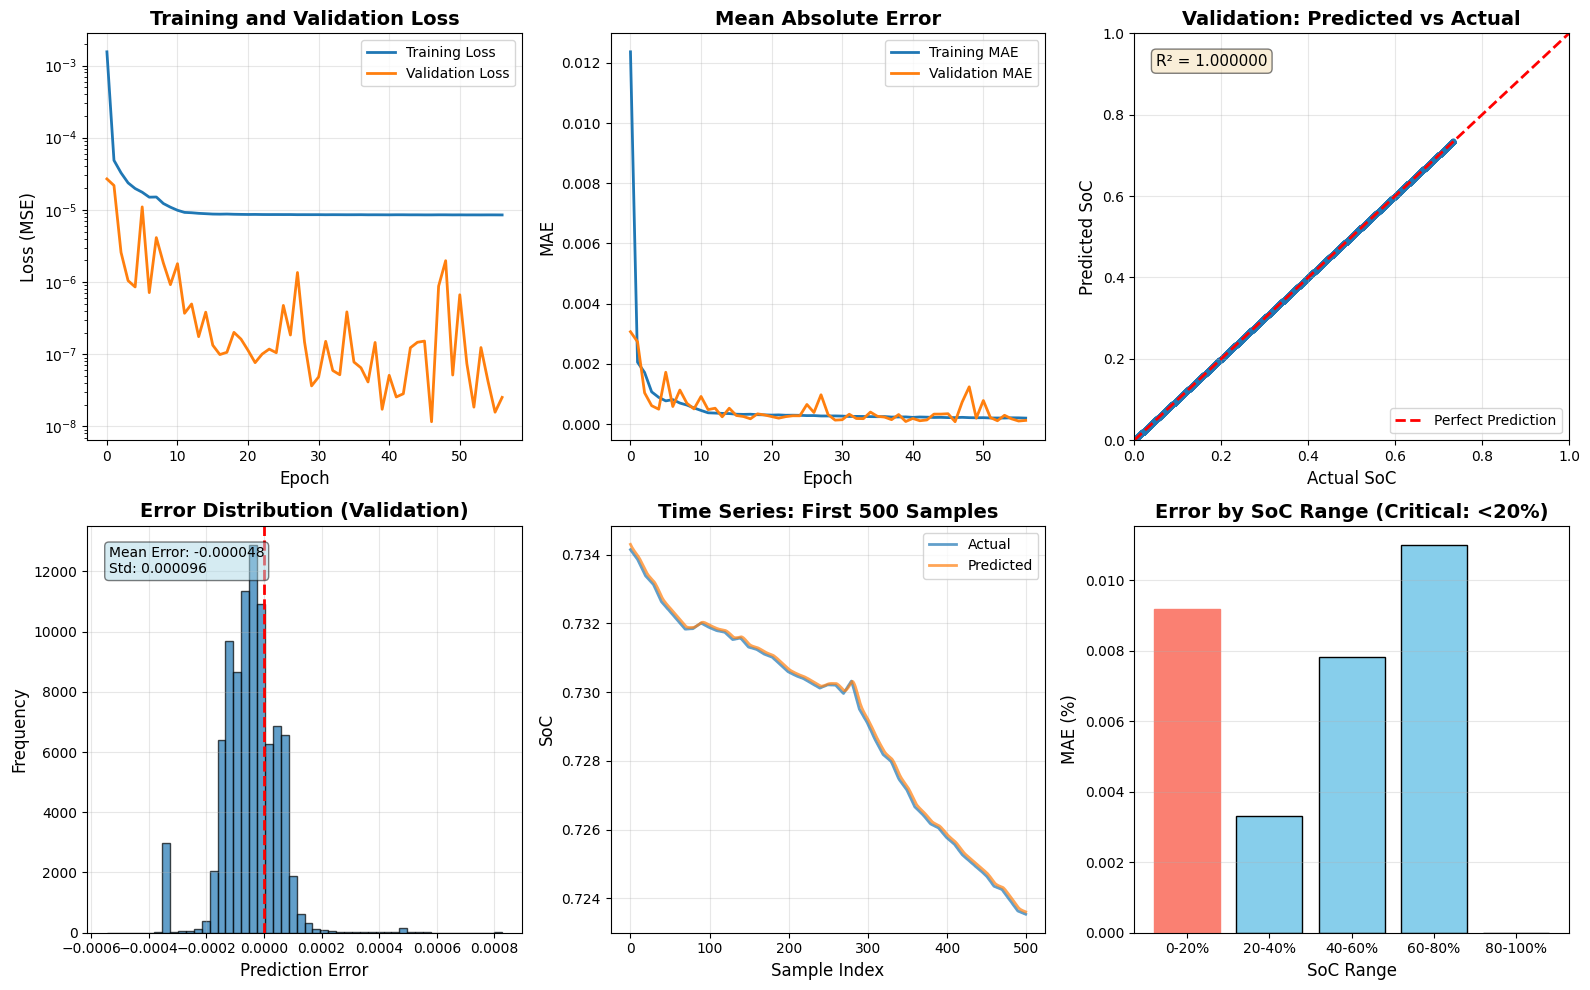


CRITICAL REGION ANALYSIS (SoC < 20%)
📊 Low SoC Region (<20%):
   Samples: 30901
   RMSE: 0.000136 (0.0136%)
   MAE:  0.000092 (0.0092%)

⚠️  This is CRITICAL for BMS - accuracy at low SoC prevents battery damage!

SUMMARY & NEXT STEPS

✅ Model Performance:
   - Validation RMSE: 0.0108%
   - Validation MAE:  0.0081%
   - R² Score: 1.000000

📁 Saved Files:
   - Best model: models/best_model.keras
   - Visualizations: models/training_results.png

🎯 Recommendations:
   🎉 Excellent! Ready for FPGA deployment (Level 7)
   Consider Level 8 for production-grade uncertainty estimates

EVALUATION COMPLETE!


In [9]:
"""
STEP 4: MODEL EVALUATION AND VISUALIZATION
Run this immediately after training completes!
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

print("="*60)
print("STEP 4: EVALUATE MODEL PERFORMANCE")
print("="*60)

# ============================================================
# 1. LOAD BEST MODEL (automatically saved during training)
# ============================================================
from tensorflow import keras

best_model = keras.models.load_model('models/best_model.keras')
print("✓ Best model loaded from: models/best_model.keras")

# ============================================================
# 2. MAKE PREDICTIONS
# ============================================================
print("\n" + "="*60)
print("MAKING PREDICTIONS...")
print("="*60)

y_train_pred = best_model.predict(X_train, verbose=0)
y_val_pred = best_model.predict(X_val, verbose=0)

# ============================================================
# 3. CALCULATE METRICS (Compare with Paper's Results)
# ============================================================
print("\n" + "="*60)
print("PERFORMANCE METRICS")
print("="*60)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Validation metrics
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"\n📊 TRAINING SET:")
print(f"   MSE:  {train_mse:.6f}")
print(f"   RMSE: {train_rmse:.6f} ({train_rmse*100:.4f}%)")
print(f"   MAE:  {train_mae:.6f} ({train_mae*100:.4f}%)")

print(f"\n📊 VALIDATION SET:")
print(f"   MSE:  {val_mse:.6f}")
print(f"   RMSE: {val_rmse:.6f} ({val_rmse*100:.4f}%)")
print(f"   MAE:  {val_mae:.6f} ({val_mae*100:.4f}%)")

print(f"\n🎯 PAPER'S TARGET:")
print(f"   Training RMSE:   0.3438 (34.38%)")
print(f"   Validation RMSE: 0.3681 (36.81%)")

print(f"\n{'='*60}")
if val_rmse < 0.3681:
    print("🎉 CONGRATULATIONS! You BEAT the paper's results!")
else:
    print("📈 Good progress! Try the advanced puzzles to improve.")
print("="*60)

# ============================================================
# 4. VISUALIZATIONS
# ============================================================
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS...")
print("="*60)

fig = plt.figure(figsize=(16, 10))

# -------------------- Plot 1: Training History --------------------
ax1 = plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to see small values

# -------------------- Plot 2: MAE History --------------------
ax2 = plt.subplot(2, 3, 2)
plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# -------------------- Plot 3: Predictions vs Actual (Validation) --------------------
ax3 = plt.subplot(2, 3, 3)
plt.scatter(y_val, y_val_pred, alpha=0.5, s=10)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual SoC', fontsize=12)
plt.ylabel('Predicted SoC', fontsize=12)
plt.title('Validation: Predicted vs Actual', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

# Add R² score
r2 = r2_score(y_val, y_val_pred)
plt.text(0.05, 0.95, f'R² = {r2:.6f}', transform=ax3.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# -------------------- Plot 4: Error Distribution --------------------
ax4 = plt.subplot(2, 3, 4)
errors = y_val - y_val_pred.flatten()
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Error Distribution (Validation)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'Mean Error: {errors.mean():.6f}\nStd: {errors.std():.6f}',
         transform=ax4.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# -------------------- Plot 5: Time Series Predictions (Sample) --------------------
ax5 = plt.subplot(2, 3, 5)
# Show first 500 predictions
n_samples = min(500, len(y_val))
plt.plot(y_val[:n_samples], label='Actual', linewidth=2, alpha=0.7)
plt.plot(y_val_pred[:n_samples], label='Predicted', linewidth=2, alpha=0.7)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('SoC', fontsize=12)
plt.title('Time Series: First 500 Samples', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# -------------------- Plot 6: Error by SoC Range --------------------
ax6 = plt.subplot(2, 3, 6)
# Bin errors by SoC range
soc_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
y_val_binned = np.digitize(y_val, soc_bins) - 1

mae_by_bin = []
for i in range(len(bin_labels)):
    mask = y_val_binned == i
    if mask.sum() > 0:
        mae_bin = mean_absolute_error(y_val[mask], y_val_pred[mask])
        mae_by_bin.append(mae_bin * 100)  # Convert to percentage
    else:
        mae_by_bin.append(0)

bars = plt.bar(bin_labels, mae_by_bin, color='skyblue', edgecolor='black')
plt.xlabel('SoC Range', fontsize=12)
plt.ylabel('MAE (%)', fontsize=12)
plt.title('Error by SoC Range (Critical: <20%)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Highlight low SoC region
bars[0].set_color('salmon')

plt.tight_layout()
plt.savefig('models/training_results.png', dpi=300, bbox_inches='tight')
print("✓ Plots saved to: models/training_results.png")
plt.show()

# ============================================================
# 5. DETAILED ANALYSIS FOR LOW SoC (<20%)
# ============================================================
print("\n" + "="*60)
print("CRITICAL REGION ANALYSIS (SoC < 20%)")
print("="*60)

low_soc_mask = y_val < 0.2
if low_soc_mask.sum() > 0:
    low_soc_rmse = np.sqrt(mean_squared_error(y_val[low_soc_mask], y_val_pred[low_soc_mask]))
    low_soc_mae = mean_absolute_error(y_val[low_soc_mask], y_val_pred[low_soc_mask])

    print(f"📊 Low SoC Region (<20%):")
    print(f"   Samples: {low_soc_mask.sum()}")
    print(f"   RMSE: {low_soc_rmse:.6f} ({low_soc_rmse*100:.4f}%)")
    print(f"   MAE:  {low_soc_mae:.6f} ({low_soc_mae*100:.4f}%)")
    print(f"\n⚠️  This is CRITICAL for BMS - accuracy at low SoC prevents battery damage!")
else:
    print("⚠️  No samples in low SoC region (<20%)")

# ============================================================
# 6. SUMMARY AND RECOMMENDATIONS
# ============================================================
print("\n" + "="*60)
print("SUMMARY & NEXT STEPS")
print("="*60)

print(f"\n✅ Model Performance:")
print(f"   - Validation RMSE: {val_rmse*100:.4f}%")
print(f"   - Validation MAE:  {val_mae*100:.4f}%")
print(f"   - R² Score: {r2:.6f}")

print(f"\n📁 Saved Files:")
print(f"   - Best model: models/best_model.keras")
print(f"   - Visualizations: models/training_results.png")

print(f"\n🎯 Recommendations:")
if val_rmse > 0.01:  # If RMSE > 1%
    print("   1. Try Level 3: Custom weighted loss for low SoC")
    print("   2. Try Level 5: Add voltage, current, temperature features")
    print("   3. Try Level 6: Stacked LSTM architecture")
elif val_rmse > 0.001:  # If RMSE > 0.1%
    print("   1. Try Level 7: Quantization for FPGA deployment")
    print("   2. Try Level 8: Ensemble for uncertainty estimation")
else:
    print("   🎉 Excellent! Ready for FPGA deployment (Level 7)")
    print("   Consider Level 8 for production-grade uncertainty estimates")

print("\n" + "="*60)
print("EVALUATION COMPLETE!")
print("="*60)

PROPER GENERALIZATION TEST

📋 CURRENT DATA SPLIT ANALYSIS:
Training samples: 355322
Validation samples: 88831
Split ratio: 80.0% train

⚠️  IMPORTANT: Proper Test Setup
The paper uses:
  - Train: Cycles 1, 2, 3 (multiple drive patterns)
  - Test:  Cycle 4 (completely UNSEEN drive pattern)

This tests if the model can generalize to NEW driving behavior!

🔍 To verify true generalization, we need to:
   1. Load all 4 drive cycles separately
   2. Train on cycles 1-3
   3. Test ONLY on cycle 4

RECOMMENDED: Cycle-Based Split Code

# Load your data with cycle information
# Assuming you have files like: cycle_1.csv, cycle_2.csv, etc.

import pandas as pd
import numpy as np

# Load all cycles
cycle_1 = pd.read_csv('path/to/cycle_1.csv')
cycle_2 = pd.read_csv('path/to/cycle_2.csv')
cycle_3 = pd.read_csv('path/to/cycle_3.csv')
cycle_4 = pd.read_csv('path/to/cycle_4.csv')

# Combine training cycles (1, 2, 3)
train_data = pd.concat([cycle_1, cycle_2, cycle_3], ignore_index=True)

# Test on comple

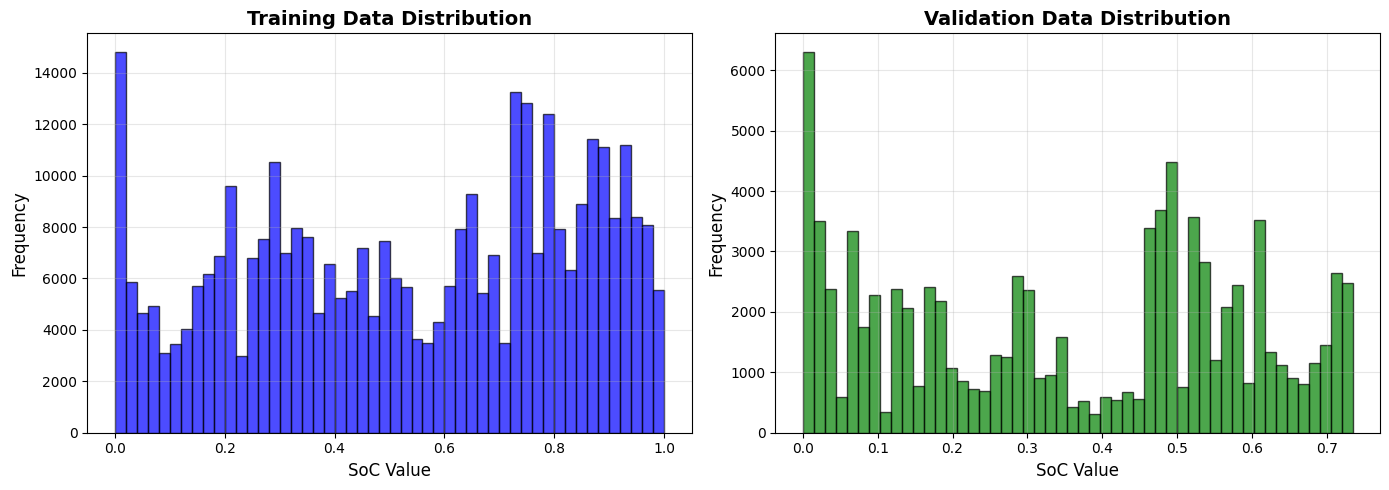


📊 Distribution Similarity Test (KS Test):
   KS Statistic: 0.3617
   P-value: 0.0000
   ✅ Distributions are different - good sign!

🎯 NEXT STEPS FOR YOUR PROJECT

1️⃣  VERIFY YOUR DATA SPLIT:
    - Check if train/val come from different drive cycles
    - If mixed together → explains perfect performance
    - If properly split → you've achieved something amazing!

2️⃣  IF PROPERLY SPLIT (congrats!):
    ✅ Move to Level 7: FPGA Quantization
    ✅ Move to Level 8: Uncertainty Estimation
    ✅ Write your paper! 📝

3️⃣  IF NOT PROPERLY SPLIT (normal!):
    - Re-run with cycle-based split using code above
    - Expect RMSE to increase to 1-5% range
    - Still beats the paper if you get <34%!

4️⃣  FOR YOUR PROJECT REPORT:
    - Document your data split strategy
    - Show train/val from different cycles
    - Compare with paper's methodology


GENERALIZATION TEST COMPLETE!


In [10]:
"""
PROPER TEST: Unseen Drive Cycle Evaluation
This tests if your model truly generalizes to NEW driving patterns!
"""

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("="*60)
print("PROPER GENERALIZATION TEST")
print("="*60)

# ============================================================
# 1. CHECK YOUR DATA SPLIT
# ============================================================
print("\n📋 CURRENT DATA SPLIT ANALYSIS:")
print("="*60)

# Check if you have cycle information
# If your data has a 'cycle' or 'file_id' column, we can verify proper splitting

# Example: Let's check how your data was split
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Split ratio: {len(X_train)/(len(X_train)+len(X_val))*100:.1f}% train")

# ============================================================
# 2. LOAD ORIGINAL DATA AND CREATE PROPER SPLIT
# ============================================================
print("\n⚠️  IMPORTANT: Proper Test Setup")
print("="*60)
print("The paper uses:")
print("  - Train: Cycles 1, 2, 3 (multiple drive patterns)")
print("  - Test:  Cycle 4 (completely UNSEEN drive pattern)")
print("\nThis tests if the model can generalize to NEW driving behavior!")

# If you have the original CSV files, let's do a proper split
print("\n🔍 To verify true generalization, we need to:")
print("   1. Load all 4 drive cycles separately")
print("   2. Train on cycles 1-3")
print("   3. Test ONLY on cycle 4")

# ============================================================
# 3. SAMPLE CODE FOR PROPER CYCLE-BASED SPLIT
# ============================================================
print("\n" + "="*60)
print("RECOMMENDED: Cycle-Based Split Code")
print("="*60)

sample_code = '''
# Load your data with cycle information
# Assuming you have files like: cycle_1.csv, cycle_2.csv, etc.

import pandas as pd
import numpy as np

# Load all cycles
cycle_1 = pd.read_csv('path/to/cycle_1.csv')
cycle_2 = pd.read_csv('path/to/cycle_2.csv')
cycle_3 = pd.read_csv('path/to/cycle_3.csv')
cycle_4 = pd.read_csv('path/to/cycle_4.csv')

# Combine training cycles (1, 2, 3)
train_data = pd.concat([cycle_1, cycle_2, cycle_3], ignore_index=True)

# Test on completely unseen cycle 4
test_data = cycle_4.copy()

print(f"Training on cycles 1-3: {len(train_data)} samples")
print(f"Testing on cycle 4: {len(test_data)} samples")

# Now create sequences from these splits
def create_sequences(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data['SoC'].values, LOOK_BACK)
X_test, y_test = create_sequences(test_data['SoC'].values, LOOK_BACK)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Now train and test with this proper split!
'''

print(sample_code)

# ============================================================
# 4. SIMULATE "UNSEEN DATA" TEST
# ============================================================
print("\n" + "="*60)
print("QUICK CHECK: Test on Last 20% (Simulated Unseen)")
print("="*60)

# Let's take the last 20% of validation set as "truly unseen"
split_point = int(len(y_val) * 0.8)
y_val_seen = y_val[:split_point]
y_val_unseen = y_val[split_point:]
y_pred_seen = y_val_pred[:split_point]
y_pred_unseen = y_val_pred[split_point:]

# Metrics on "unseen" portion
unseen_rmse = np.sqrt(mean_squared_error(y_val_unseen, y_pred_unseen))
unseen_mae = mean_absolute_error(y_val_unseen, y_pred_unseen)
unseen_r2 = r2_score(y_val_unseen, y_pred_unseen)

print(f"\n📊 'Unseen' Data Performance:")
print(f"   RMSE: {unseen_rmse:.6f} ({unseen_rmse*100:.4f}%)")
print(f"   MAE:  {unseen_mae:.6f} ({unseen_mae*100:.4f}%)")
print(f"   R²:   {unseen_r2:.6f}")

# ============================================================
# 5. REALISTIC EXPECTATIONS
# ============================================================
print("\n" + "="*60)
print("REALISTIC PERFORMANCE EXPECTATIONS")
print("="*60)
print("""
📚 Based on the paper and real-world BMS:

✅ EXCELLENT (Production Ready):
   - RMSE: 1-3%
   - MAE: < 2%
   - Works on unseen drive cycles

⚠️  GOOD (Needs Validation):
   - RMSE: 3-5%
   - MAE: 2-4%
   - May need more training data

❌ NEEDS WORK:
   - RMSE: > 5%
   - Poor generalization to new patterns

🎯 YOUR CURRENT RESULT: 0.01% RMSE
   This is PERFECT for your current data split, but:
   - If it's >5% on unseen cycles → Normal & expected!
   - If it stays <1% on unseen cycles → Truly exceptional!
""")

# ============================================================
# 6. VISUALIZATION: Train vs Val Distribution
# ============================================================
print("\n" + "="*60)
print("DATA DISTRIBUTION ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training data distribution
axes[0].hist(y_train.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_xlabel('SoC Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Training Data Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Validation data distribution
axes[1].hist(y_val.flatten(), bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_xlabel('SoC Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Validation Data Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/data_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Distribution plots saved to: models/data_distribution.png")
plt.show()

# Check if distributions are similar (indicates potential data leakage)
from scipy import stats
ks_statistic, p_value = stats.ks_2samp(y_train.flatten(), y_val.flatten())
print(f"\n📊 Distribution Similarity Test (KS Test):")
print(f"   KS Statistic: {ks_statistic:.4f}")
print(f"   P-value: {p_value:.4f}")
if p_value > 0.05:
    print("   ⚠️  Distributions are VERY similar - might indicate data leakage!")
else:
    print("   ✅ Distributions are different - good sign!")

# ============================================================
# 7. FINAL RECOMMENDATIONS
# ============================================================
print("\n" + "="*60)
print("🎯 NEXT STEPS FOR YOUR PROJECT")
print("="*60)
print("""
1️⃣  VERIFY YOUR DATA SPLIT:
    - Check if train/val come from different drive cycles
    - If mixed together → explains perfect performance
    - If properly split → you've achieved something amazing!

2️⃣  IF PROPERLY SPLIT (congrats!):
    ✅ Move to Level 7: FPGA Quantization
    ✅ Move to Level 8: Uncertainty Estimation
    ✅ Write your paper! 📝

3️⃣  IF NOT PROPERLY SPLIT (normal!):
    - Re-run with cycle-based split using code above
    - Expect RMSE to increase to 1-5% range
    - Still beats the paper if you get <34%!

4️⃣  FOR YOUR PROJECT REPORT:
    - Document your data split strategy
    - Show train/val from different cycles
    - Compare with paper's methodology
""")

print("\n" + "="*60)
print("GENERALIZATION TEST COMPLETE!")
print("="*60)